In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import GradientBoostingRegressor as GBR
import xgboost as XGB
from sklearn.metrics import mean_squared_error
from ISLP import load_data

# Load and prepare data
Boston = load_data("Boston")
X = Boston.drop('medv', axis=1)
y = Boston['medv']
feature_names = list(X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create regression model (changed from classifier)
model = XGB.XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0.5
)

# Train model
model.fit(X_train, y_train)

# Evaluate using regression metrics
y_hat_boost = model.predict(X_test)
print(f'Mean Squared Error: {np.round(np.mean((y_test - y_hat_boost)**2), 3)}')

Mean Squared Error: 30.372


#### Técnica de Interpretabilidade - SHAP

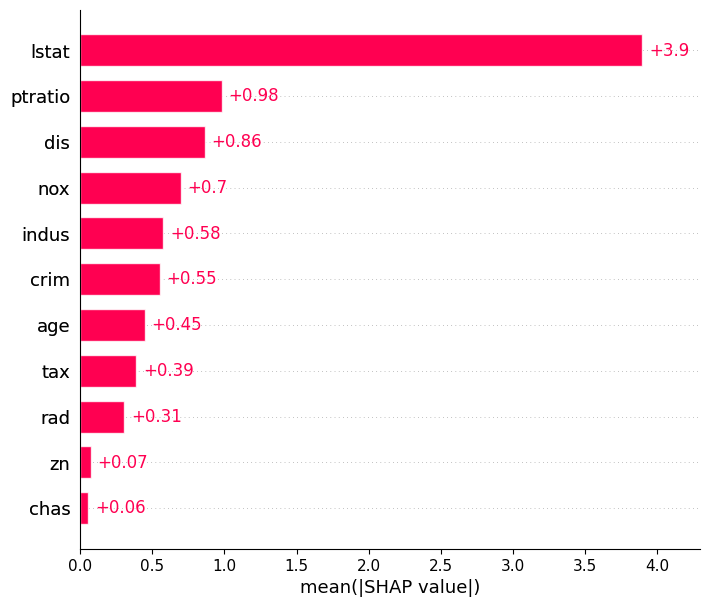

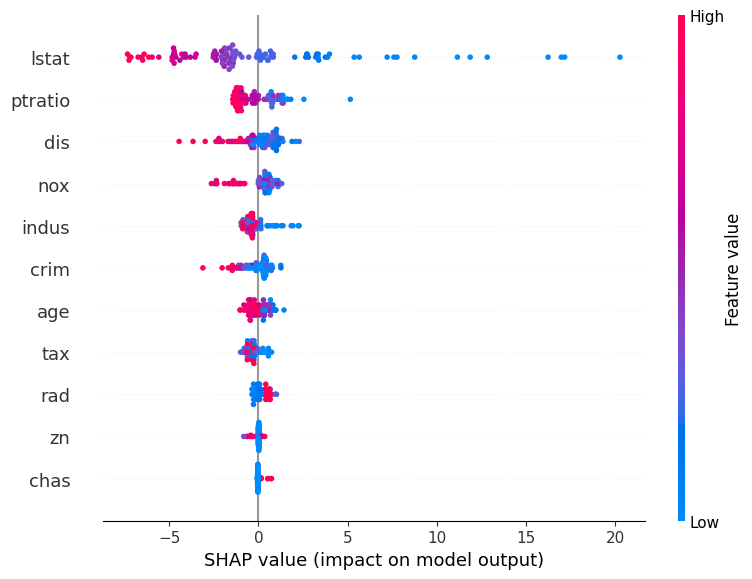

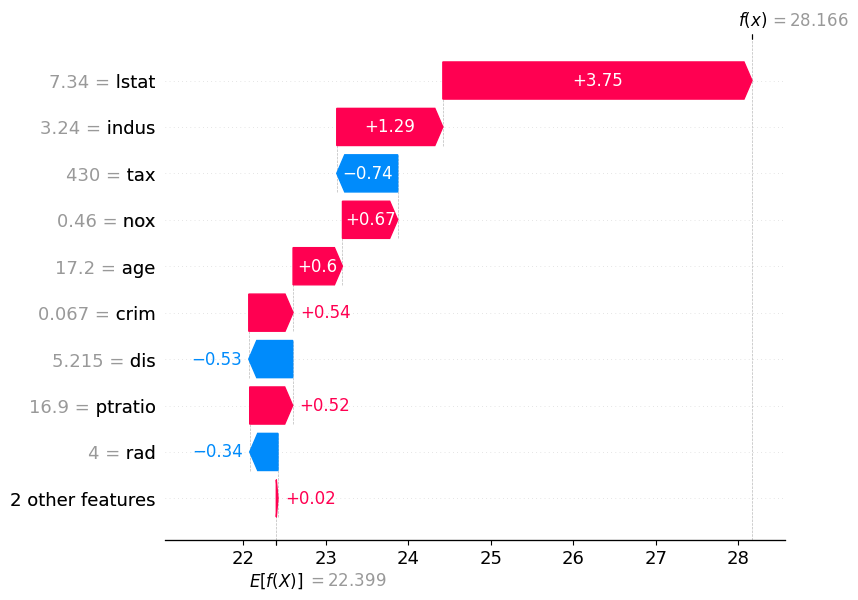

In [20]:
import shap

# Interpretabilidade com SHAP (agora usando X_test diretamente)
explainer = shap.Explainer(model, X_train)

# Calculando os valores SHAP para o X_test
shap_values = explainer(X_test)

# Gráfico de ranking das variáveis mais importantes
shap.plots.bar(shap_values, max_display=12)

# Resumo global da importância das variáveis
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Explicação local de uma predição específica (exemplo da primeira amostra de teste)
shap.plots.waterfall(shap_values[0])

# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])